In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier,kneighbors_graph
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [3]:
df = pd.read_csv('../DATA/student_data.csv')
df = df[df["Output"] != "Enrolled"]
df
# df.head()
# df.describe()
# df_1st.head()

,Marital status,Application mode,Application order,Course,evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Output
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


label encoder

In [4]:
le_enc = LabelEncoder()
scaler = StandardScaler()
df["Output"] = le_enc.fit_transform(df["Output"])
df["Output"]
# Dropout=0, Enrolled=1, Graduate=2

0       0
1       1
2       0
3       1
4       1
       ..
4419    1
4420    0
4421    0
4422    1
4423    1
Name: Output, Length: 3630, dtype: int64

In [62]:
# features array
features = [
    "Age at enrollment",
    "Curricular units 1st sem (grade)",
    # "International",
    "Scholarship holder",
    # "Gender",
    # "Marital status",
    "Tuition fees up to date",
    "Debtor",
    "Curricular units 2nd sem (grade)",
    "Unemployment rate",
    "Inflation rate",
    "GDP"
]

X = df[features]
y = df["Output"]

# X_scaled = scaler.fit_transform(X)

print(f"X shape: {X.shape}")
# print(f"X shape: {X_scaled.shape}")
print(f"y shape: {y.shape}")
X


X shape: (3630, 9)
y shape: (3630,)


,Age at enrollment,Curricular units 1st sem (grade),Scholarship holder,Tuition fees up to date,Debtor,Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP
0,20,0.000000,0,1,0,0.000000,10.8,1.4,1.74
1,19,14.000000,0,0,0,13.666667,13.9,-0.3,0.79
2,19,0.000000,0,0,0,0.000000,10.8,1.4,1.74
3,20,13.428571,0,1,0,12.400000,9.4,-0.8,-3.12
4,45,12.333333,0,1,0,13.000000,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...
4419,19,13.600000,0,1,0,12.666667,15.5,2.8,-4.06
4420,18,12.000000,0,0,1,11.000000,11.1,0.6,2.02
4421,30,14.912500,1,1,0,13.500000,13.9,-0.3,0.79
4422,20,13.800000,1,1,0,12.000000,9.4,-0.8,-3.12


In [63]:
# X, y = shuffle(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
y_test

3734    0
13      1
2182    1
3939    1
2054    1
       ..
297     1
4410    1
630     1
688     1
37      0
Name: Output, Length: 726, dtype: int64

In [47]:
import numpy as np

# Feature order:
# ["Age at enrollment", "Curricular units 1st sem (grade)", "Scholarship holder",
#  "Tuition fees up to date", "Debtor", "Curricular units 2nd sem (grade)",
#  "Unemployment rate", "Inflation rate", "GDP"]

# Ranges for the features
def generate_random_student_data(n):
    np.random.seed(42)  # for reproducibility
    data = []

    for _ in range(n):
        age = np.random.randint(17, 70)  # age between 17 and 70
        grade_1 = np.round(np.random.uniform(0, 20), 2)  # grade between 0 and 20
        scholarship = np.random.choice([0, 1])
        tuition_paid = np.random.choice([0, 1])
        debtor = np.random.choice([0, 1])
        grade_2 = np.round(np.random.uniform(0, 20), 2)
        unemployment = np.round(np.random.uniform(3.0, 15.0), 2)  # realistic range
        inflation = np.round(np.random.uniform(-2.0, 5.0), 2)  # possible inflation values
        gdp = np.round(np.random.uniform(-1.0, 5.0), 2)  # GDP growth/shrink range

        row = [age, grade_1, scholarship, tuition_paid, debtor, grade_2, unemployment, inflation, gdp]
        data.append(row)

    return np.array(data)

# Generate 4 random test cases
test_array = generate_random_student_data(3)
print(test_array)


[[55.   15.93  0.    0.    1.   11.97  4.87 -0.91 -0.65]
 [40.    6.67  1.    1.    0.    0.41 14.64  3.83  0.27]
 [37.   12.35  1.    1.    0.    8.64  6.49  2.28 -0.16]]


KNN

Confusion Matrix:
 [[195  89]
 [ 35 407]]

Classification Report:
               precision    recall  f1-score   support

    Graduate       0.85      0.69      0.76       284
     Dropout       0.82      0.92      0.87       442

    accuracy                           0.83       726
   macro avg       0.83      0.80      0.81       726
weighted avg       0.83      0.83      0.83       726

0.8292011019283747


<Axes: >

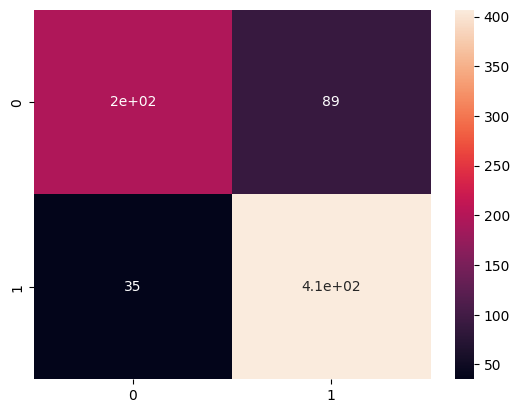

In [66]:
# K-th nearest neighbor
# def knn_model(X_train,X_test,y_train,y_test,test_array=None):
knn = KNeighborsClassifier(n_neighbors=10,metric='minkowski')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Graduate','Dropout']))
# pred = knn.predict(test_array)
# print(pred)
print(knn.fit(X_train,y_train).score(X_test,y_test))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)



# knn_model(X_train, X_test, y_train, y_test,test_array)

Naive bayes

Confusion Matrix:
 [[194  90]
 [ 34 408]]

Classification Report:
               precision    recall  f1-score   support

    Graduate       0.85      0.68      0.76       284
     Dropout       0.82      0.92      0.87       442

    accuracy                           0.83       726
   macro avg       0.84      0.80      0.81       726
weighted avg       0.83      0.83      0.82       726

[0 0 1]


c:\Users\ADMIN777\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


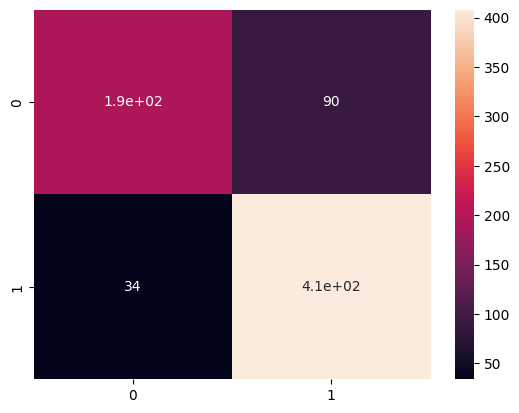

In [67]:
# naive bayes
NV_bayes = GaussianNB()
NV_bayes.fit(X_train,y_train)
y_pred = NV_bayes.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Graduate','Dropout']))
# pred = NV_bayes.predict(test_array)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

test_pred = NV_bayes.predict(test_array)
print(test_pred)
# print(pred)

Logistic regression

Confusion Matrix:
 [[184 100]
 [ 23 419]]

Classification Report:
               precision    recall  f1-score   support

    Graduate       0.89      0.65      0.75       284
     Dropout       0.81      0.95      0.87       442

    accuracy                           0.83       726
   macro avg       0.85      0.80      0.81       726
weighted avg       0.84      0.83      0.82       726

[0 0 1]


c:\Users\ADMIN777\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


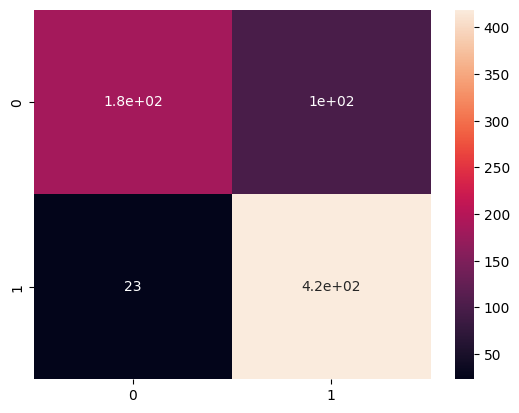

In [68]:
lg_reg = LogisticRegression(solver='lbfgs')
lg_reg.fit(X_train,y_train)
y_pred = lg_reg.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Graduate','Dropout']))
# pred = lg_reg.predict(test_array)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

test_pred = lg_reg.predict(test_array)
print(test_pred)
# print(pred)

Decision trees and random forest

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score

train error: 0.13085399449035812, test_error: 0.14325068870523416
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       284
           1       0.87      0.90      0.88       442

    accuracy                           0.86       726
   macro avg       0.85      0.85      0.85       726
weighted avg       0.86      0.86      0.86       726

[0 0 0]


c:\Users\ADMIN777\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


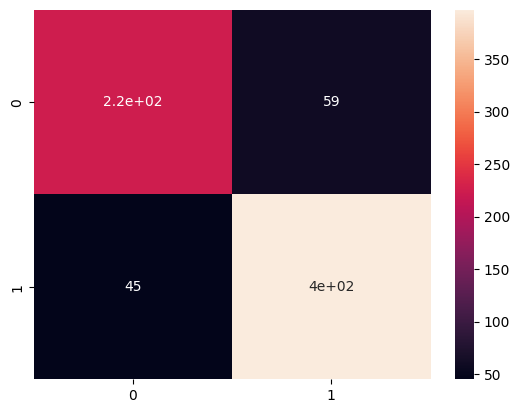

In [69]:
dts = DecisionTreeClassifier(max_depth=5,class_weight='balanced')
dts.fit(X_train,y_train)
y_pred_test = dts.predict(X_test)
y_pred_train = dts.predict(X_train)
# own_pred = dts.predict(test_array)
class_rep = classification_report(y_test,y_pred)
conf_mat = confusion_matrix(y_test,y_pred)
train_error = mean_squared_error(y_train,y_pred_train)
test_error = mean_squared_error(y_test,y_pred_test)
# print(dts.fit(X_train,y_train).score(X_test,y_test))
# print(confusion_matrix(y_test,y_pred))

print(f"train error: {train_error}, test_error: {test_error}")
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True)
print(classification_report(y_test, y_pred_test))

test_pred = dts.predict(test_array)
print(test_pred)

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       284
           1       0.87      0.90      0.88       442

    accuracy                           0.86       726
   macro avg       0.85      0.84      0.85       726
weighted avg       0.86      0.86      0.86       726
 [[222  62]
 [ 42 400]]
Age at enrollment                   21.000000
Curricular units 1st sem (grade)    10.571429
Scholarship holder                   1.000000
Tuition fees up to date              1.000000
Debtor                               0.000000
Curricular units 2nd sem (grade)    11.000000
Unemployment rate                    8.900000
Inflation rate                       1.400000
GDP                                  3.510000
Name: 13, dtype: float64


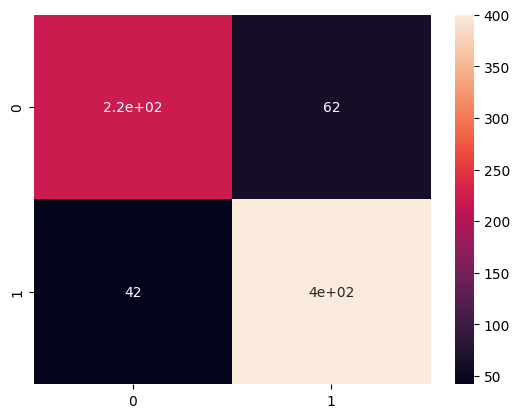

In [77]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=3000, class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred),confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)



class_0_array = X_test[y_pred == 0].iloc[1]
print(class_0_array)



graph


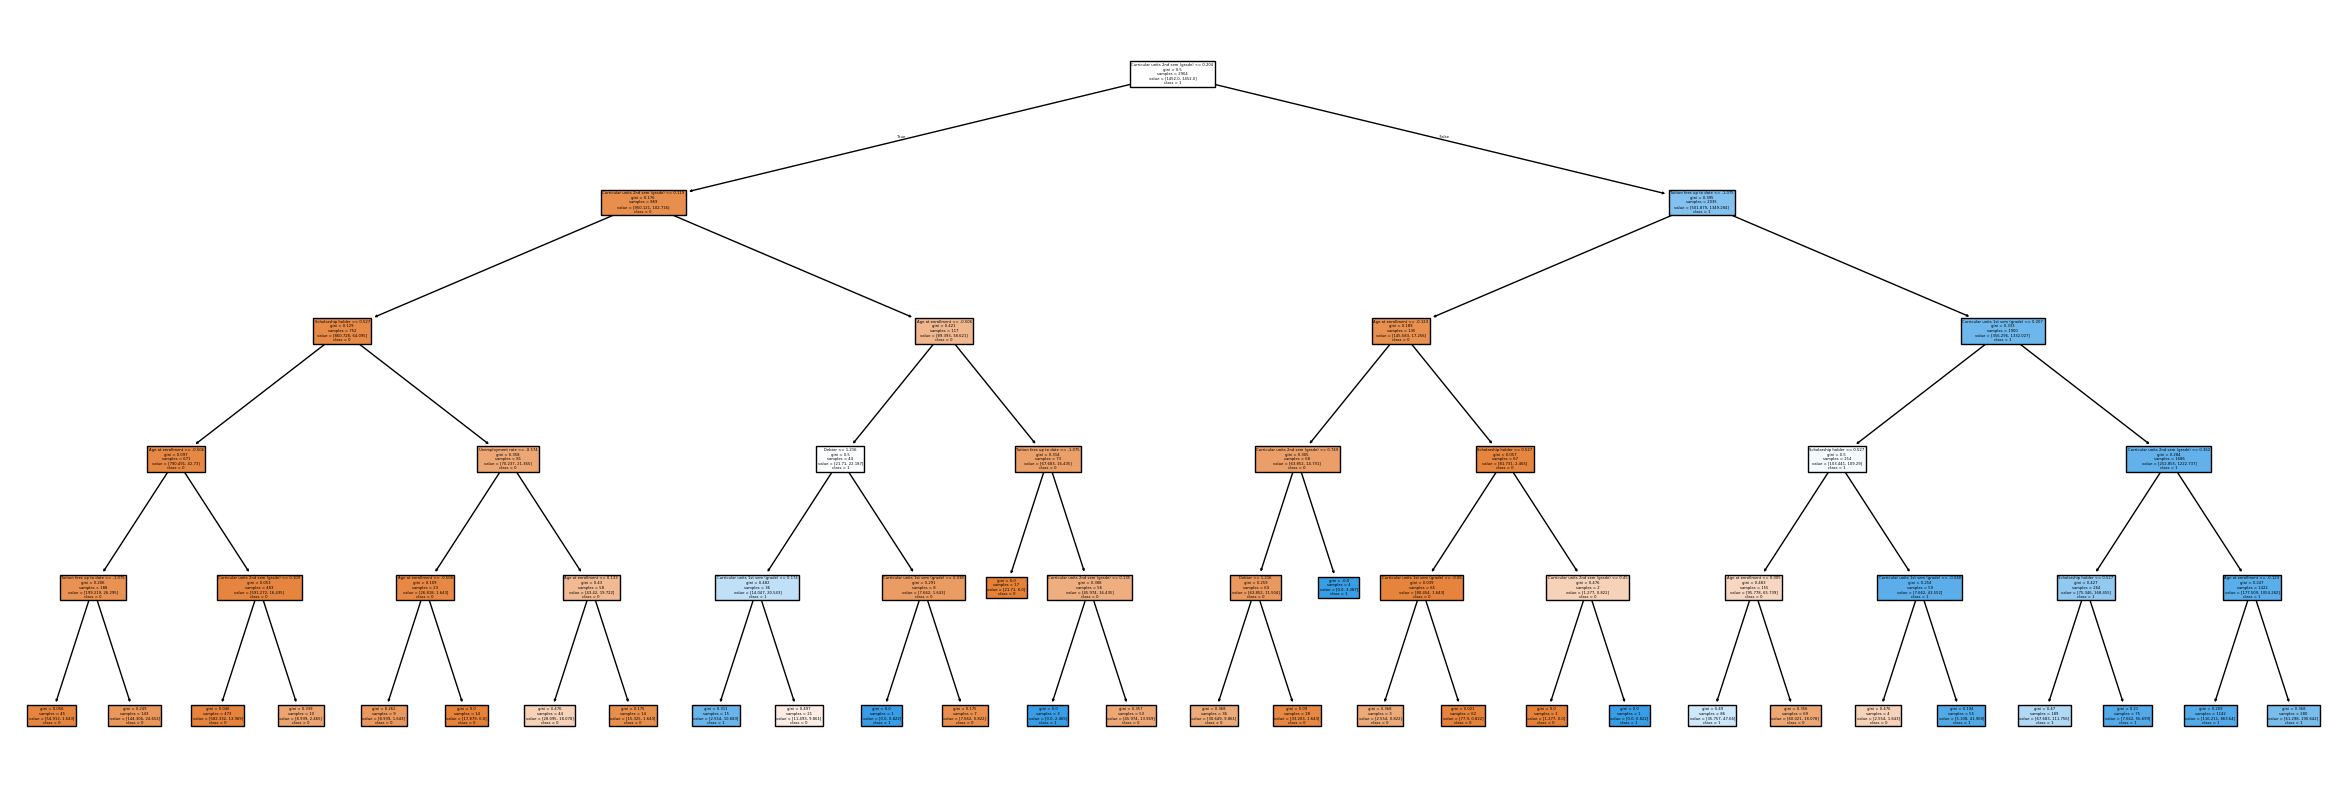

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Your trained model: dts
plt.figure(figsize=(30,10))  # Size can be adjusted
plot_tree(dts, 
          filled=True, 
          feature_names=features,  # This uses column names from training
          class_names=dts.classes_.astype(str))  # Convert classes to strings
plt.show()



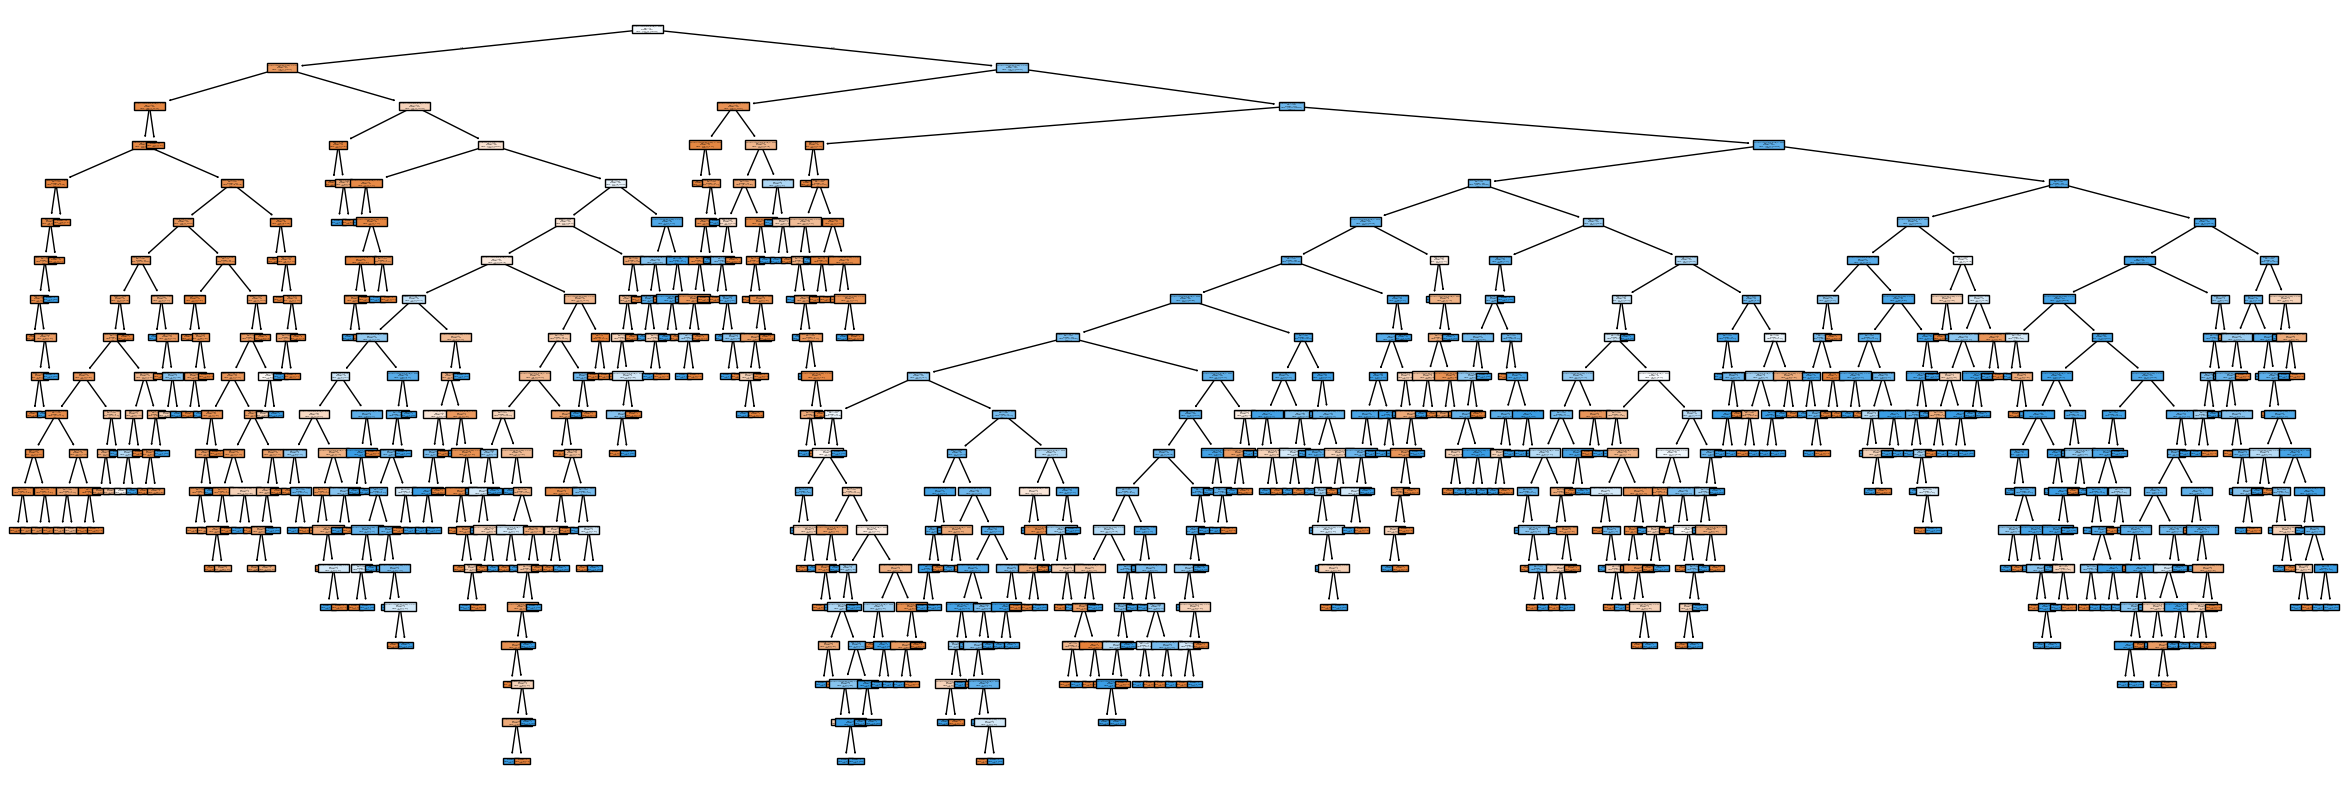

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Your trained model: clf
# Your feature names: features

# Select one tree from the forest (e.g., the first one)
estimator = clf.estimators_[0]

plt.figure(figsize=(30, 10))  # Adjust size as needed
plot_tree(estimator, 
          filled=True, 
          feature_names=features, 
          class_names=clf.classes_.astype(str))
plt.show()


In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


In [73]:
# Get predicted probabilities
 # 1 = positive class (Dropout)

y_score_log = lg_reg.predict_proba(X_test)[:, 1]
y_score_knn = knn.predict_proba(X_test)[:, 1]
y_score_nb = NV_bayes.predict_proba(X_test)[:, 1]
y_score_dts = dts.predict_proba(X_test)[:, 1]
y_score_clf = clf.predict_proba(X_test)[:, 1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_score_log)
roc_auc_log = auc(fpr_log, tpr_log)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_score_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_score_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

fpr_dts, tpr_dts, _ = roc_curve(y_test, y_score_dts)
roc_auc_dts = auc(fpr_dts, tpr_dts)

fpr_clf, tpr_clf, _ = roc_curve(y_test, y_score_clf)
roc_auc_clf = auc(fpr_clf, tpr_clf)

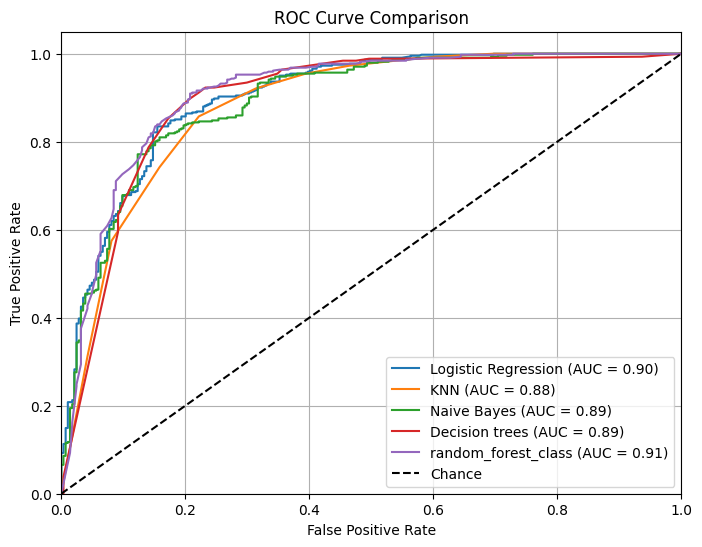

In [74]:
plt.figure(figsize=(8, 6))

plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot(fpr_dts, tpr_dts, label=f'Decision trees (AUC = {roc_auc_dts:.2f})')
plt.plot(fpr_clf, tpr_clf, label=f'random_forest_class (AUC = {roc_auc_clf:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.grid()
plt.show()


C:\Users\ADMIN777\AppData\Local\Temp\ipykernel_1072\1751706558.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


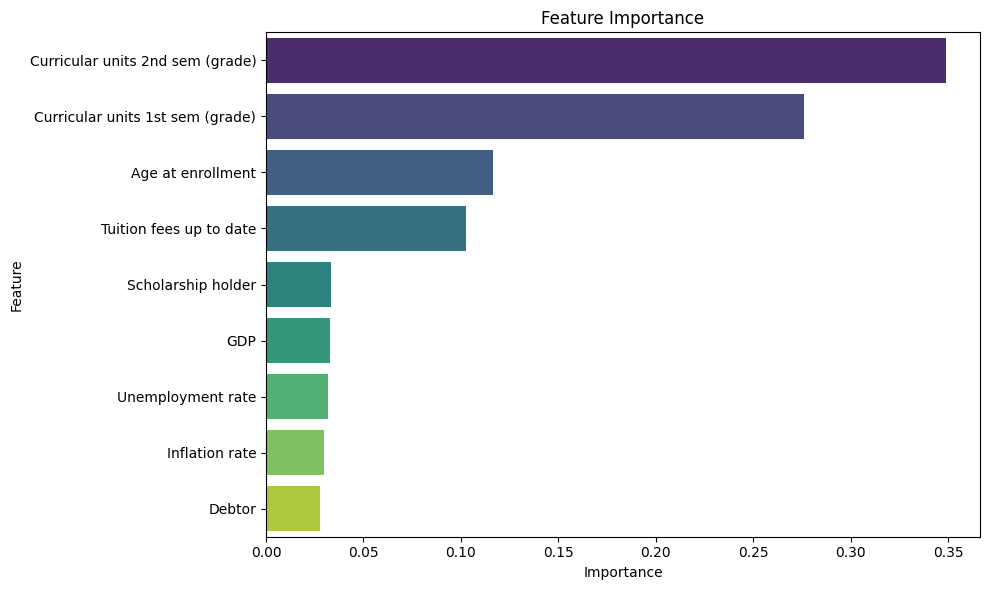

In [75]:
from sklearn.ensemble import RandomForestClassifier

# Train your model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


# Create a DataFrame for feature importances
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


In [76]:
import joblib

joblib.dump(clf,"outcome_predictor_r.pkl")

['outcome_predictor_r.pkl']